The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [24]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!

In [25]:
df = pd.read_csv("data/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [26]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [27]:
top_gender = df['sex'].value_counts().idxmax()
print(top_gender)

Male


In [28]:
top_country = df['birth_country'].value_counts().idxmax()
print(top_country)

United States of America


In [29]:
df['decade'] = (df['year']//10) *10
# Count total winners per decade
total_winners_per_decade = df.groupby('decade').size()

# Count US-born winners per decade
us_winners_per_decade = df[df['birth_country'] == "United States of America"].groupby('decade').size()

# Calculate the ratio of US-born winners to total winners per decade
ratio_per_decade = (us_winners_per_decade / total_winners_per_decade).fillna(0)

# Find the decade with the highest ratio
max_decade_usa = ratio_per_decade.idxmax()

# Print the result
print("Decade with the highest ratio of US-born Nobel winners:", max_decade_usa)

Decade with the highest ratio of US-born Nobel winners: 2000


In [30]:
# Filter out female laureates
female_df = df[df['sex'] == 'Female']

# Count total winners per decade-category combination
total_winners = df.groupby(['decade', 'category']).size()

# Count female winners per decade-category combination
female_winners = female_df.groupby(['decade', 'category']).size()

# Calculate the proportion of female winners
female_ratio = (female_winners / total_winners).fillna(0)

# Find the decade and category with the highest proportion of female laureates
max_decade_category = female_ratio.idxmax()  # Returns a tuple (decade, category)

# Store as a dictionary
max_female_dict = {max_decade_category[0]: max_decade_category[1]}

# Print the result
print("Decade and category with highest proportion of female laureates:", max_female_dict)

Decade and category with highest proportion of female laureates: {2020: 'Literature'}


In [31]:
# Filter for female laureates
female_df = df[df['sex'] == 'Female']

# Sort by year in ascending order
first_female = female_df.sort_values('year').iloc[0]

# Extract name and category
first_woman_name = first_female['full_name']
first_woman_category = first_female['category']

# Print the results
print("First woman to receive a Nobel Prize:", first_woman_name)
print("Category:", first_woman_category)

First woman to receive a Nobel Prize: Marie Curie, née Sklodowska
Category: Physics


In [32]:
# Count occurrences of each laureate
winners_count = df['full_name'].value_counts()

# Filter names that appear more than once
repeat_winners = winners_count[winners_count > 1].index.tolist()

# Store in a list
repeat_list = repeat_winners

# Print the result
print("Individuals/Organizations that won multiple Nobel Prizes:", repeat_list)

Individuals/Organizations that won multiple Nobel Prizes: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


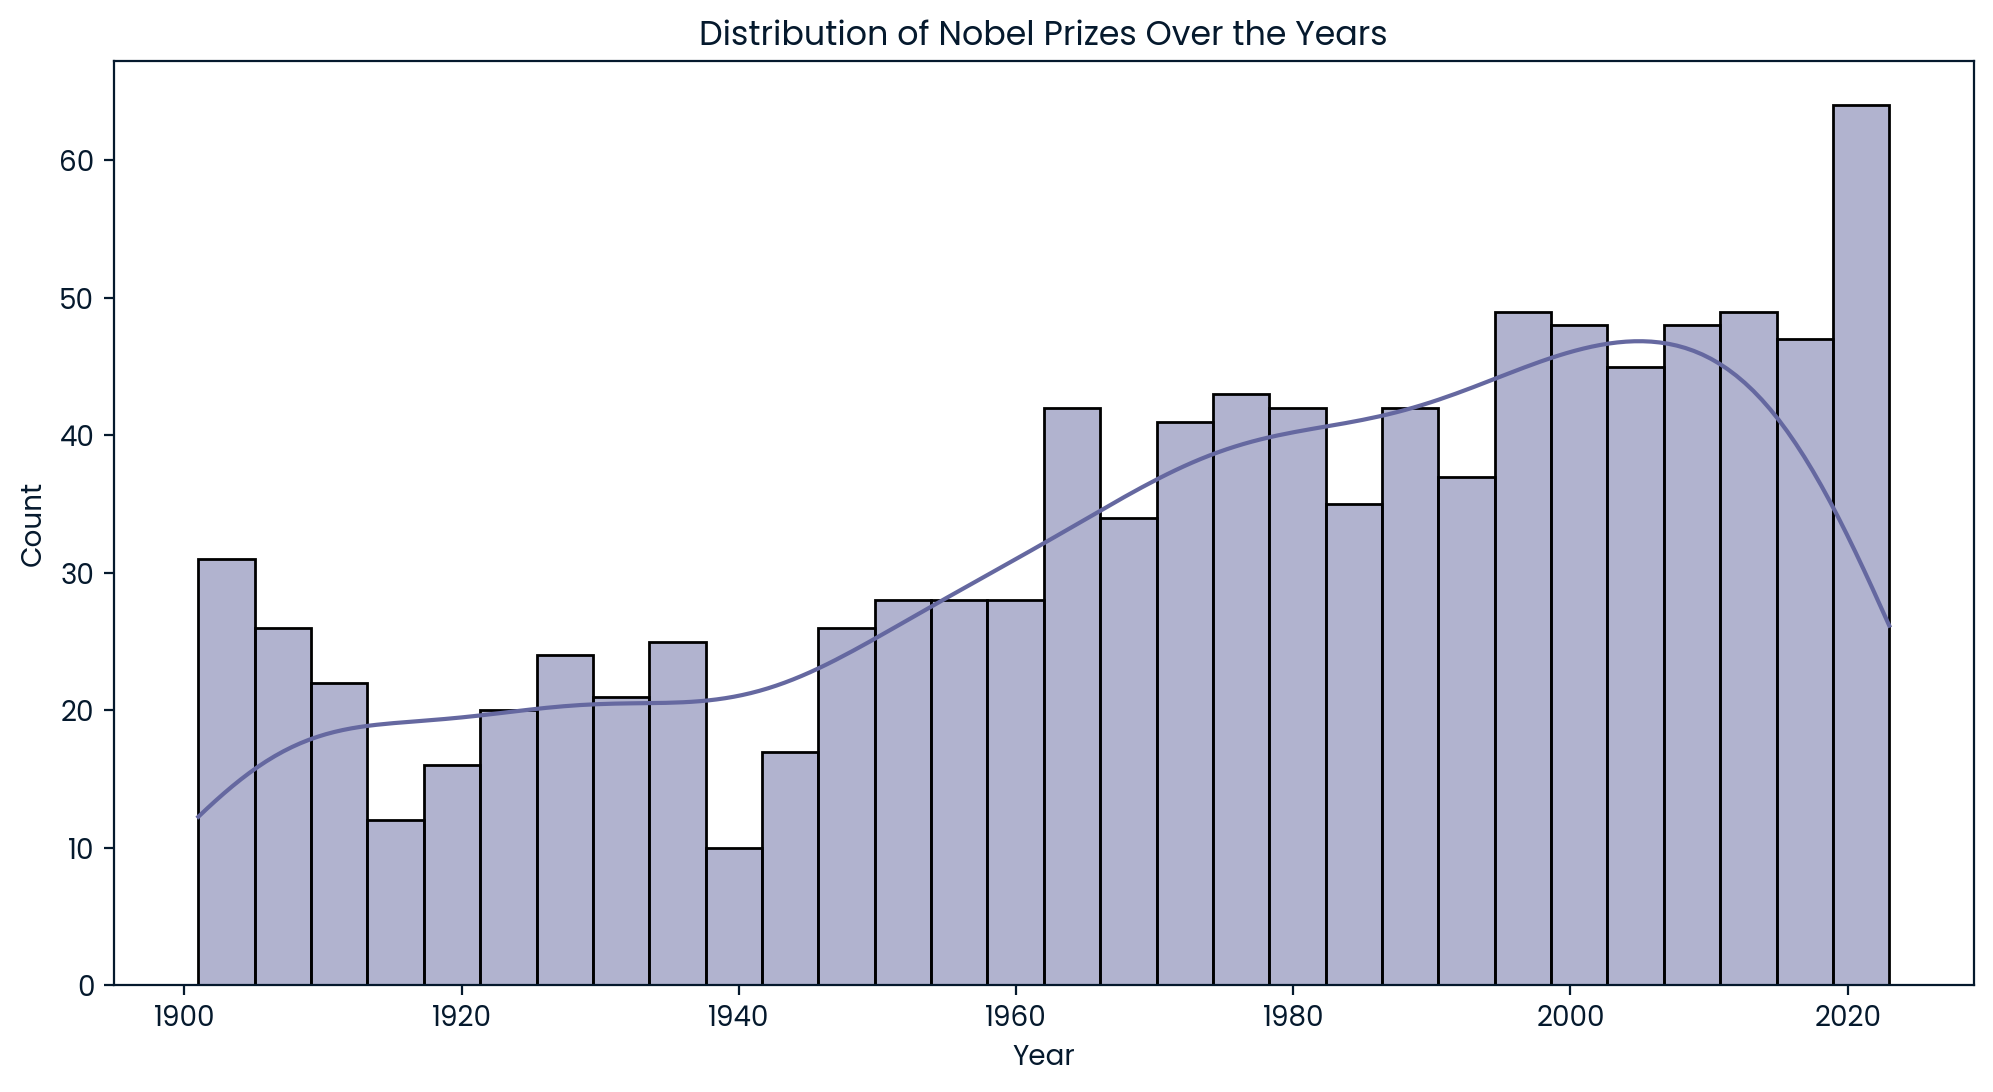

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['year'], bins=30, kde=True)
plt.title('Distribution of Nobel Prizes Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


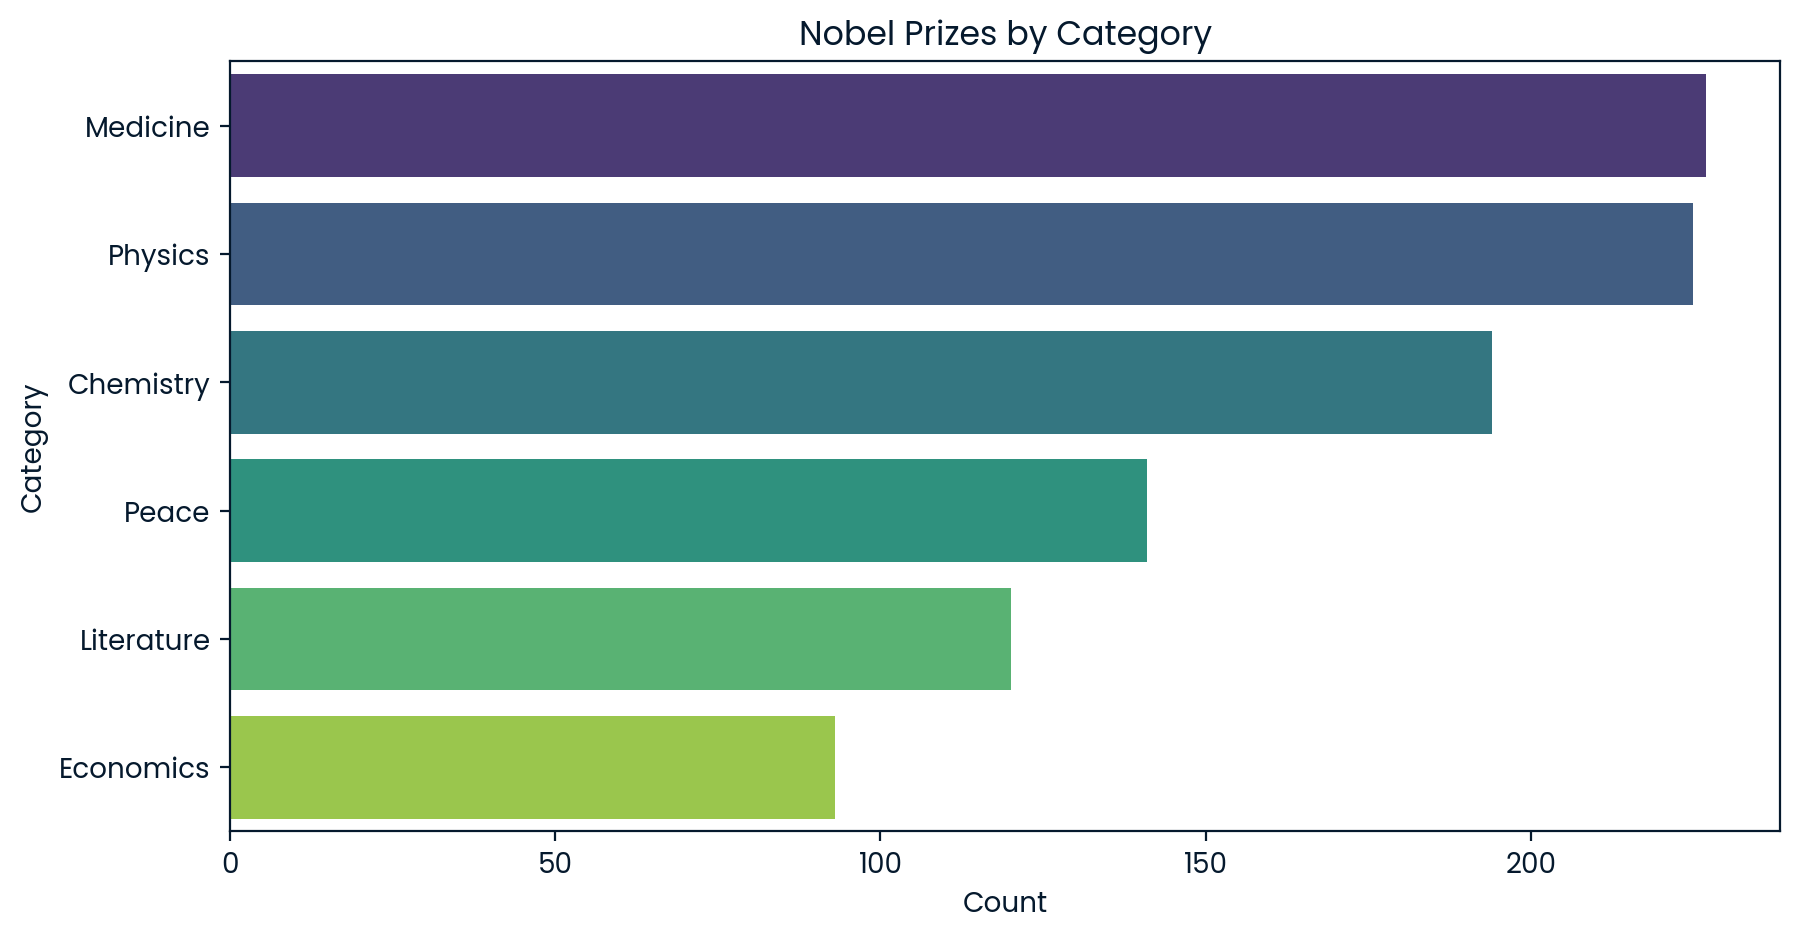

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index, palette='viridis')
plt.title('Nobel Prizes by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


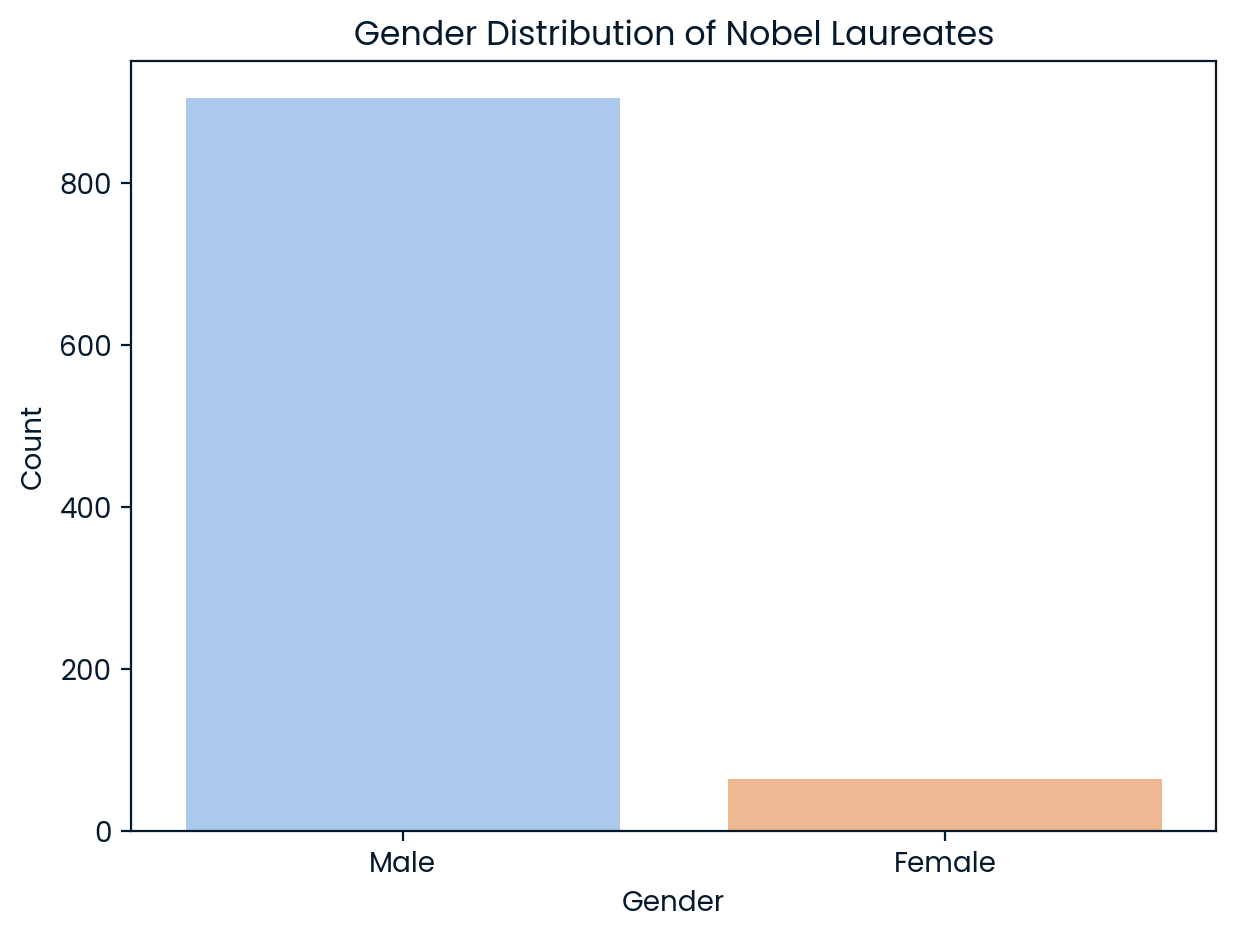

In [37]:
plt.figure(figsize=(7, 5))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Gender Distribution of Nobel Laureates')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


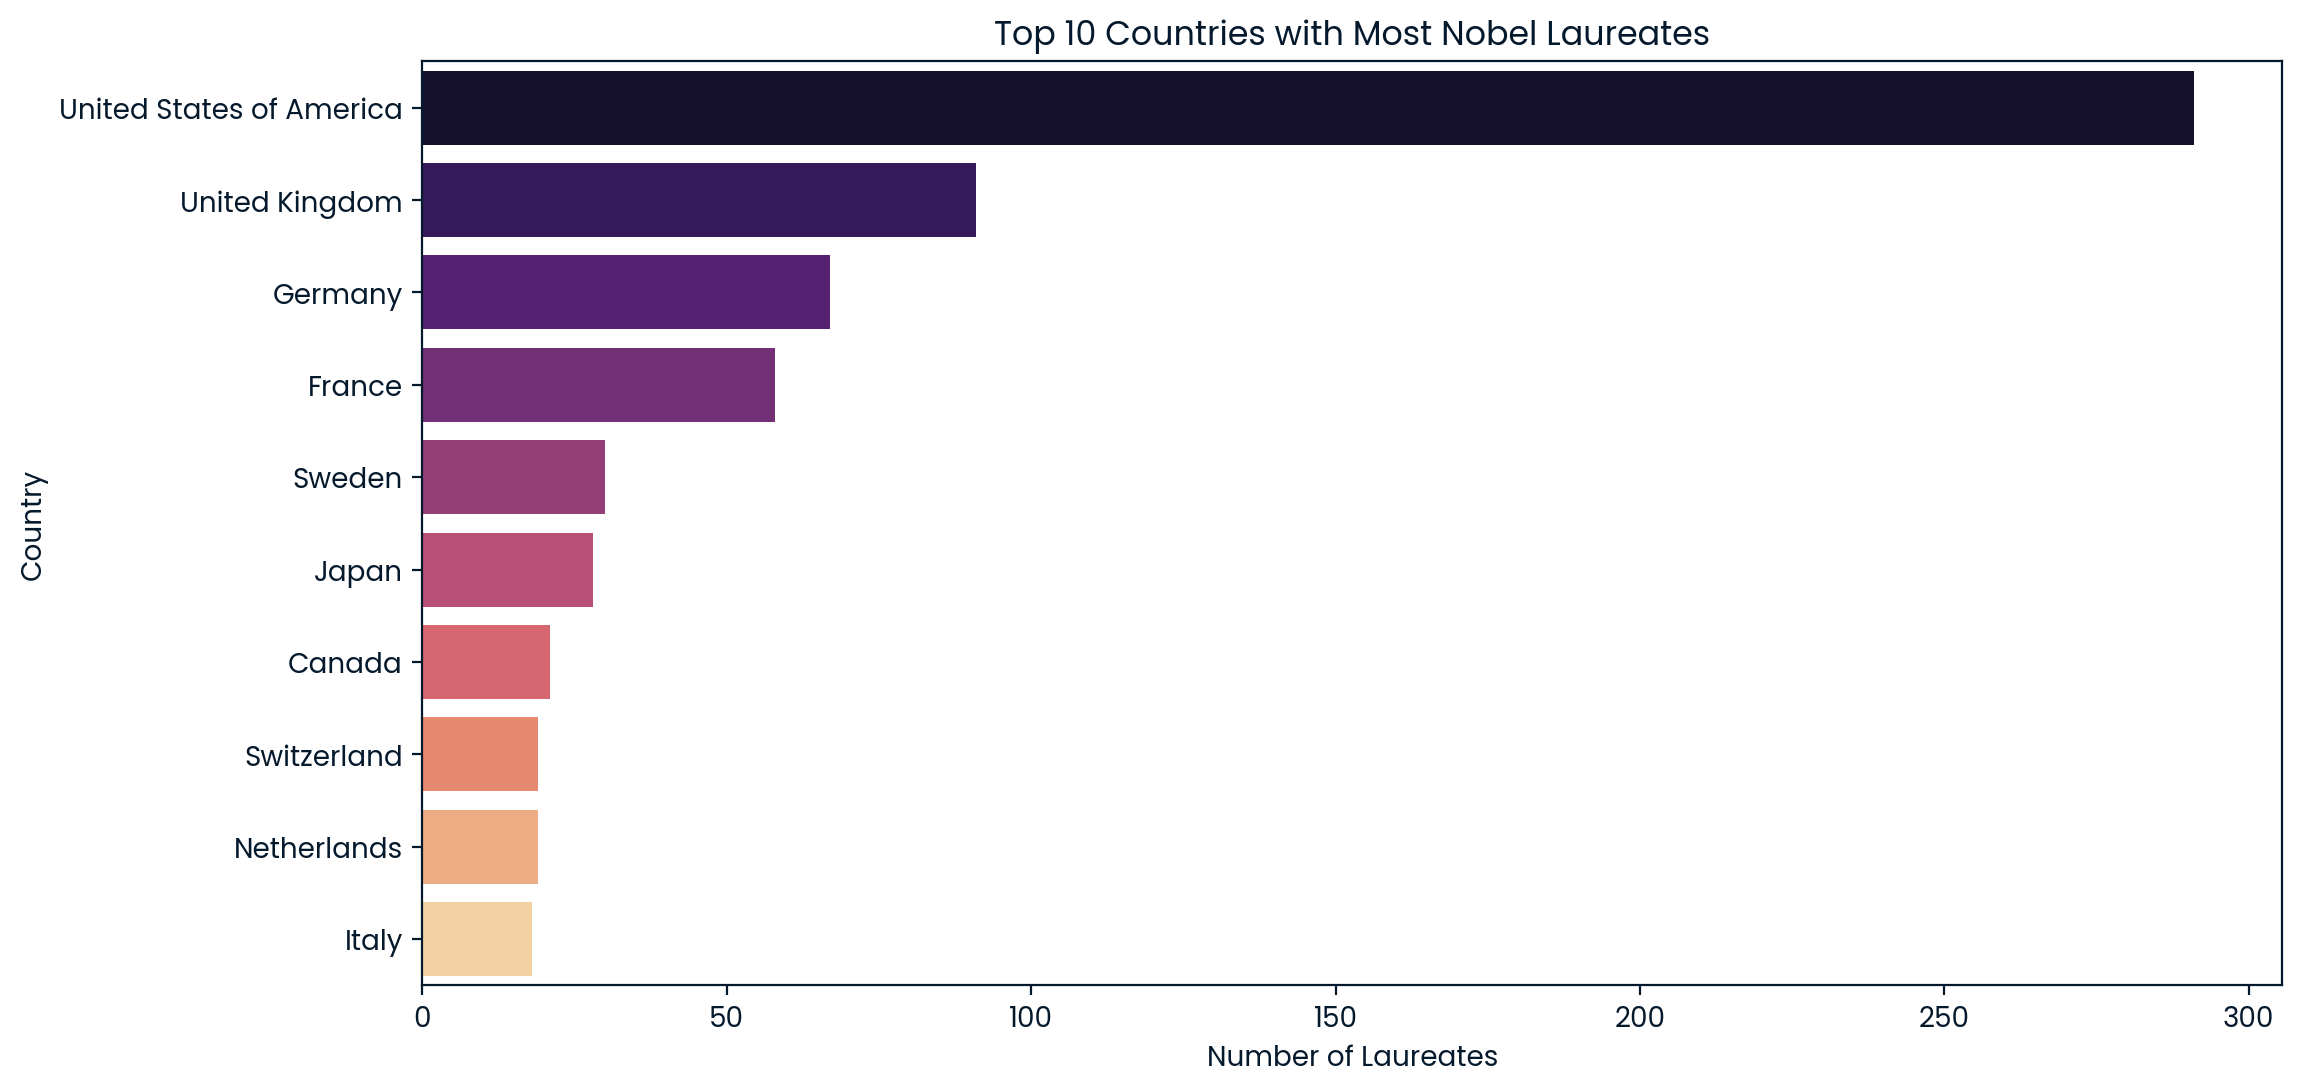

In [38]:
top_countries = df['birth_country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries with Most Nobel Laureates')
plt.xlabel('Number of Laureates')
plt.ylabel('Country')
plt.show()


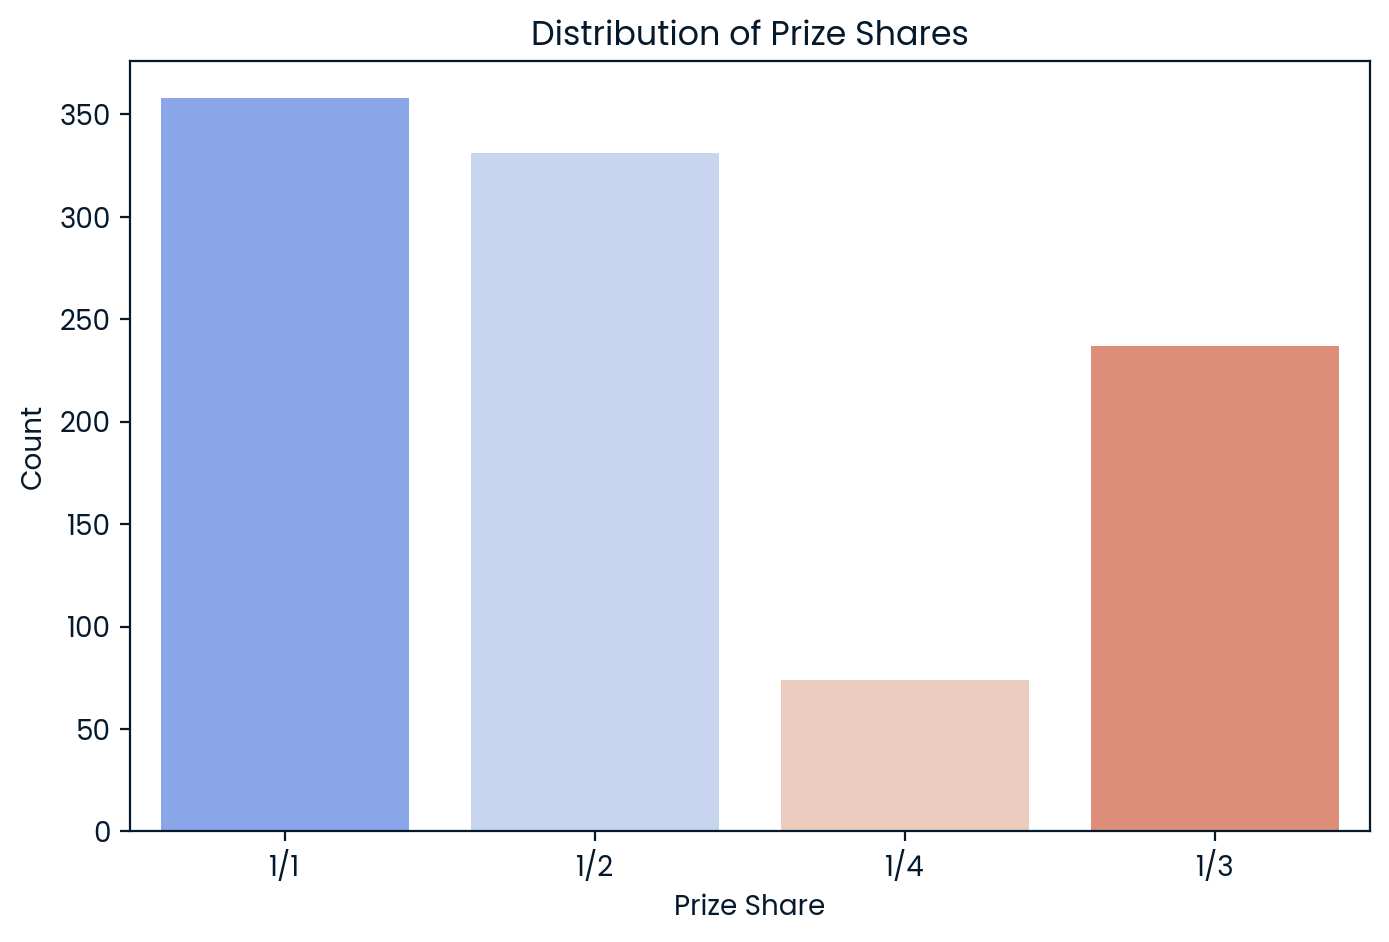

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(x='prize_share', data=df, palette='coolwarm')
plt.title('Distribution of Prize Shares')
plt.xlabel('Prize Share')
plt.ylabel('Count')
plt.show()


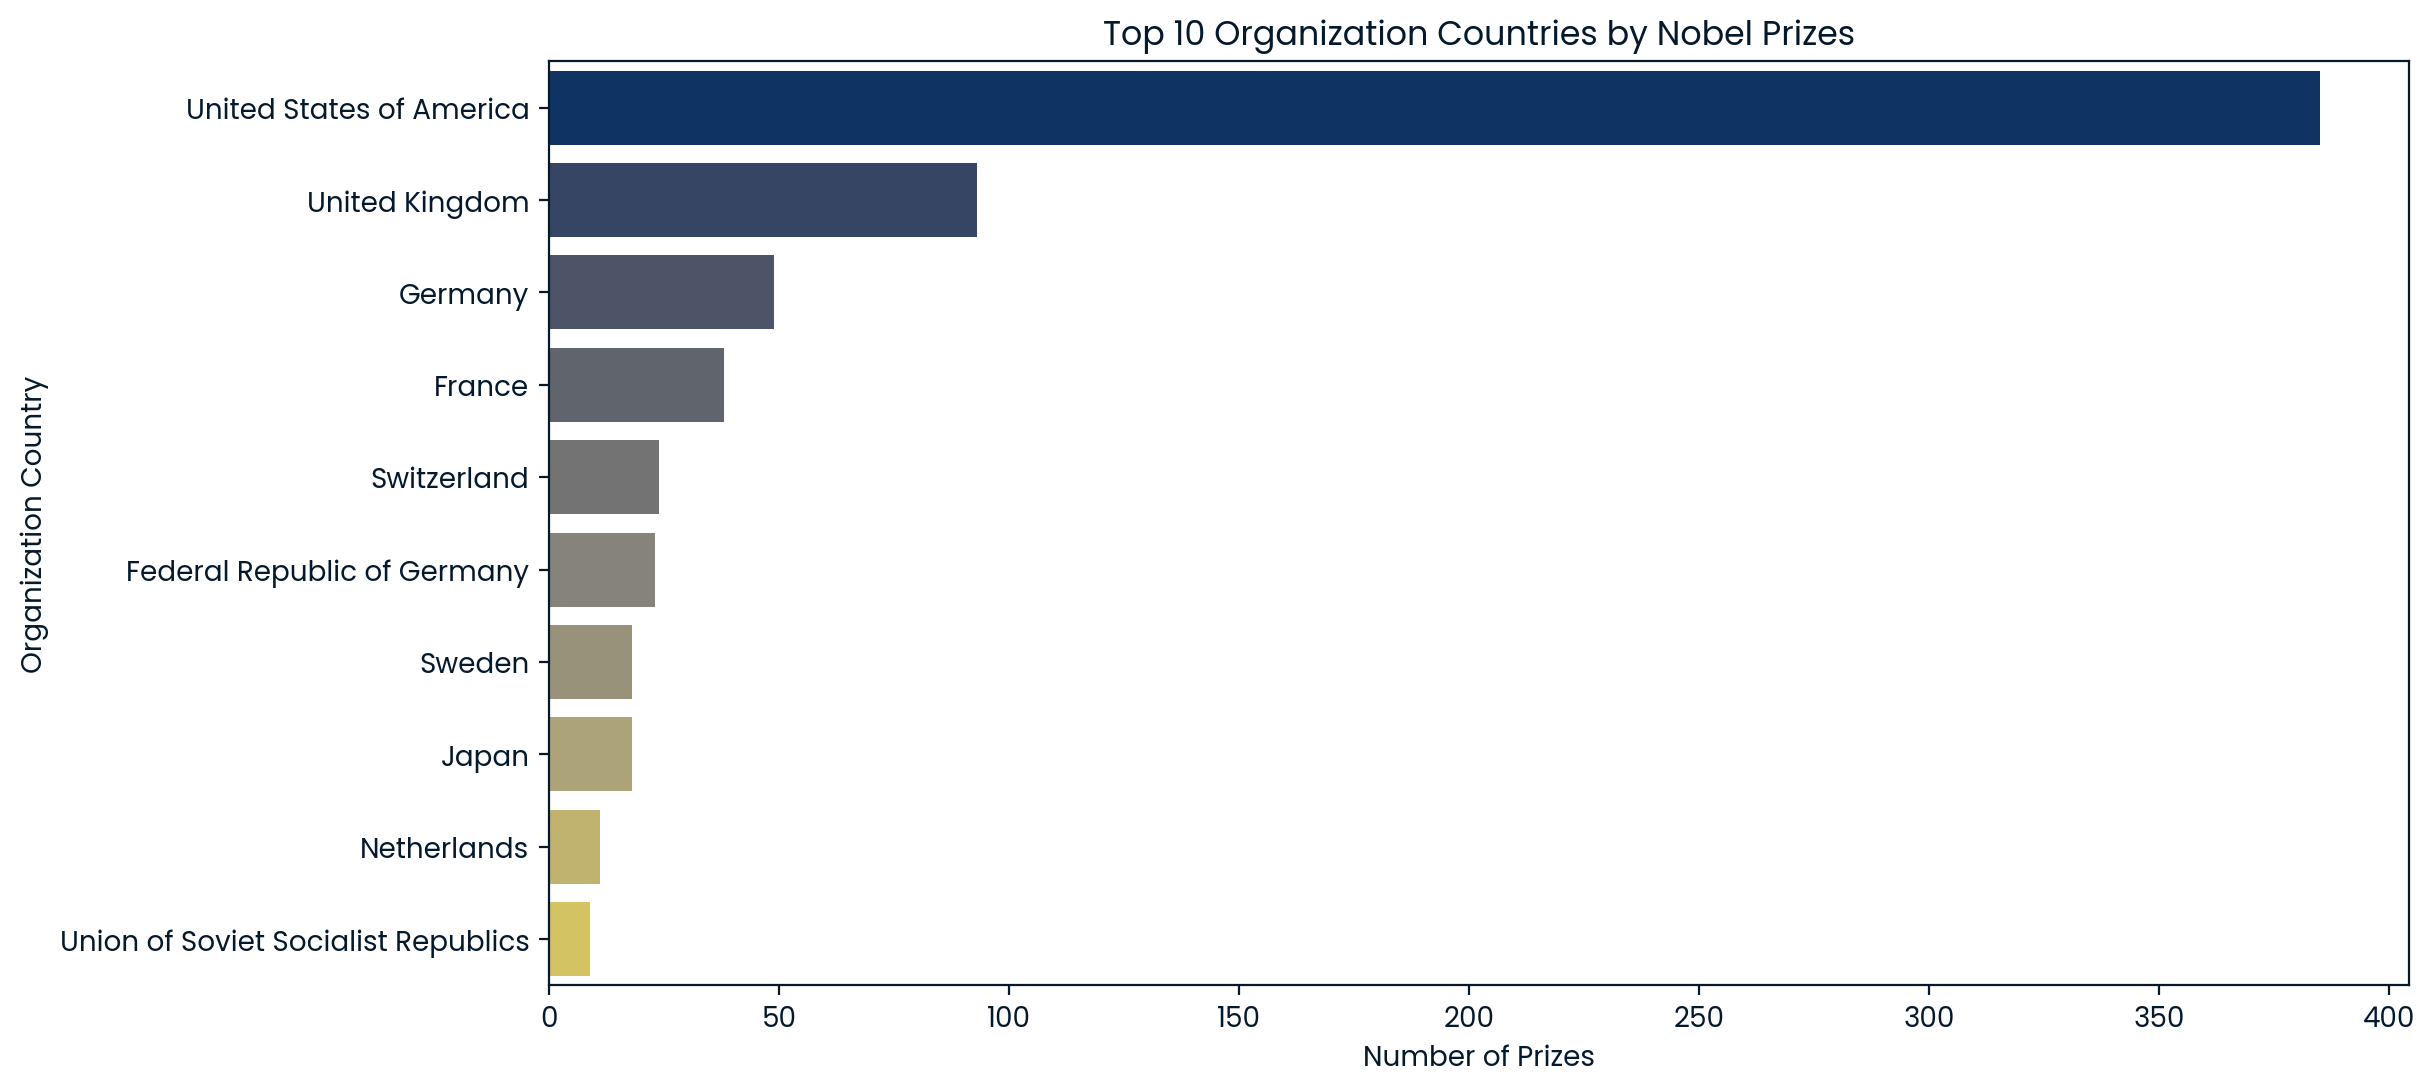

In [40]:
top_org_countries = df['organization_country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_org_countries.values, y=top_org_countries.index, palette='cividis')
plt.title('Top 10 Organization Countries by Nobel Prizes')
plt.xlabel('Number of Prizes')
plt.ylabel('Organization Country')
plt.show()


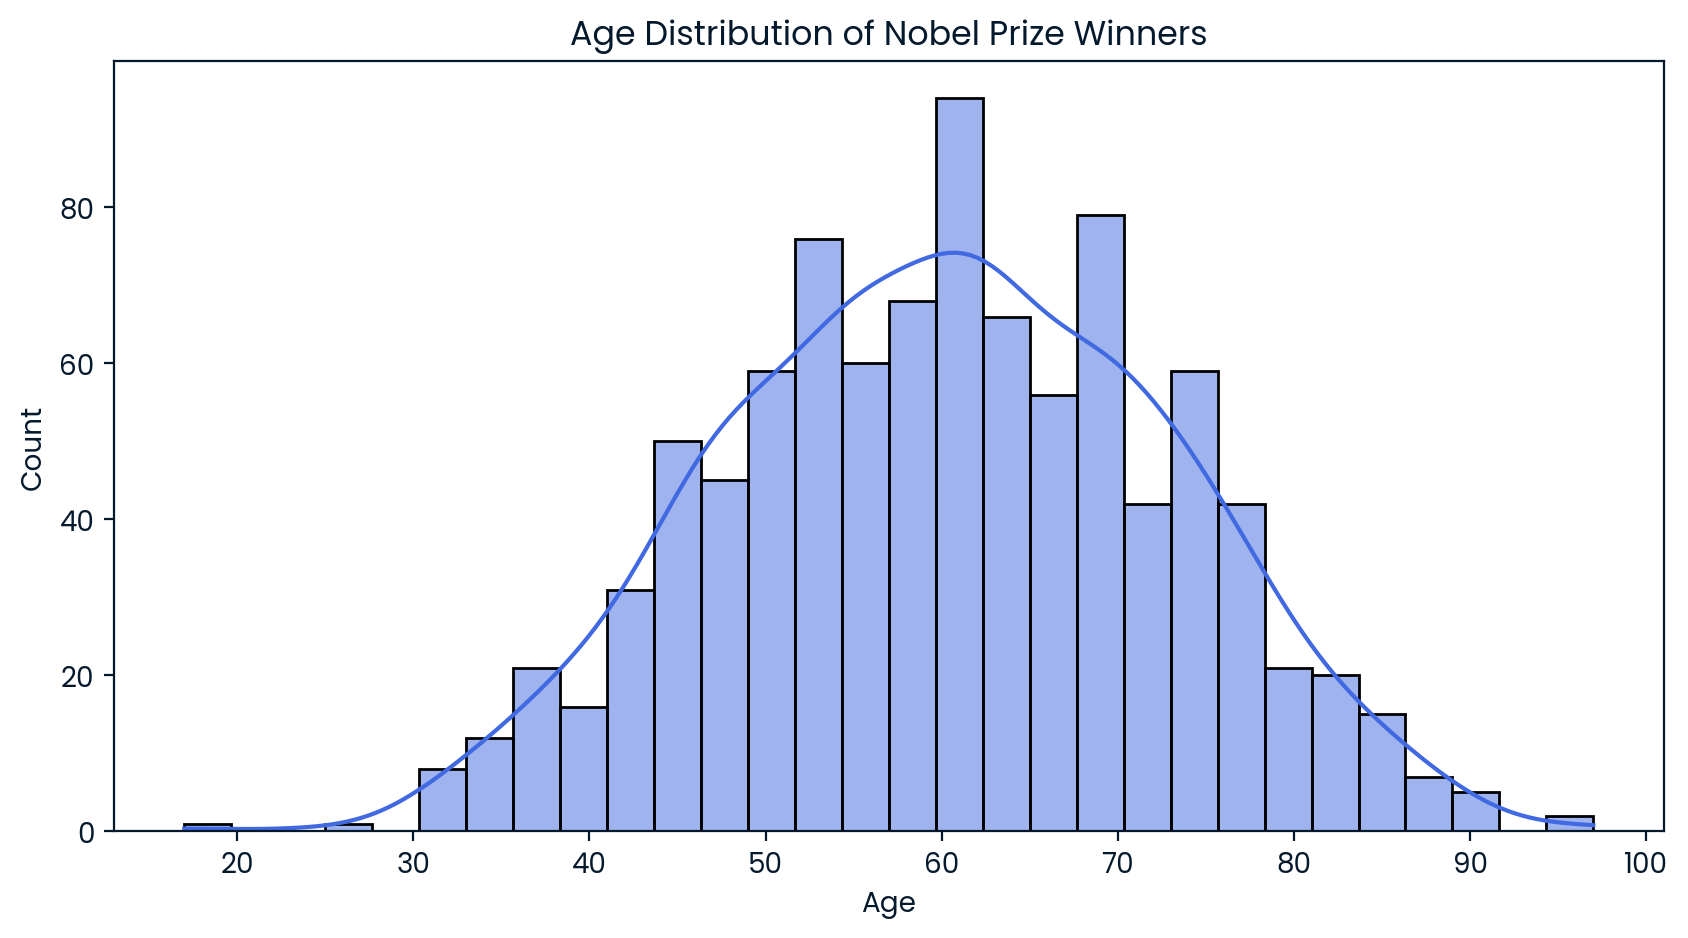

In [41]:
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['age_at_award'] = df['year'] - df['birth_date'].dt.year

plt.figure(figsize=(10, 5))
sns.histplot(df['age_at_award'].dropna(), bins=30, kde=True, color='royalblue')
plt.title('Age Distribution of Nobel Prize Winners')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


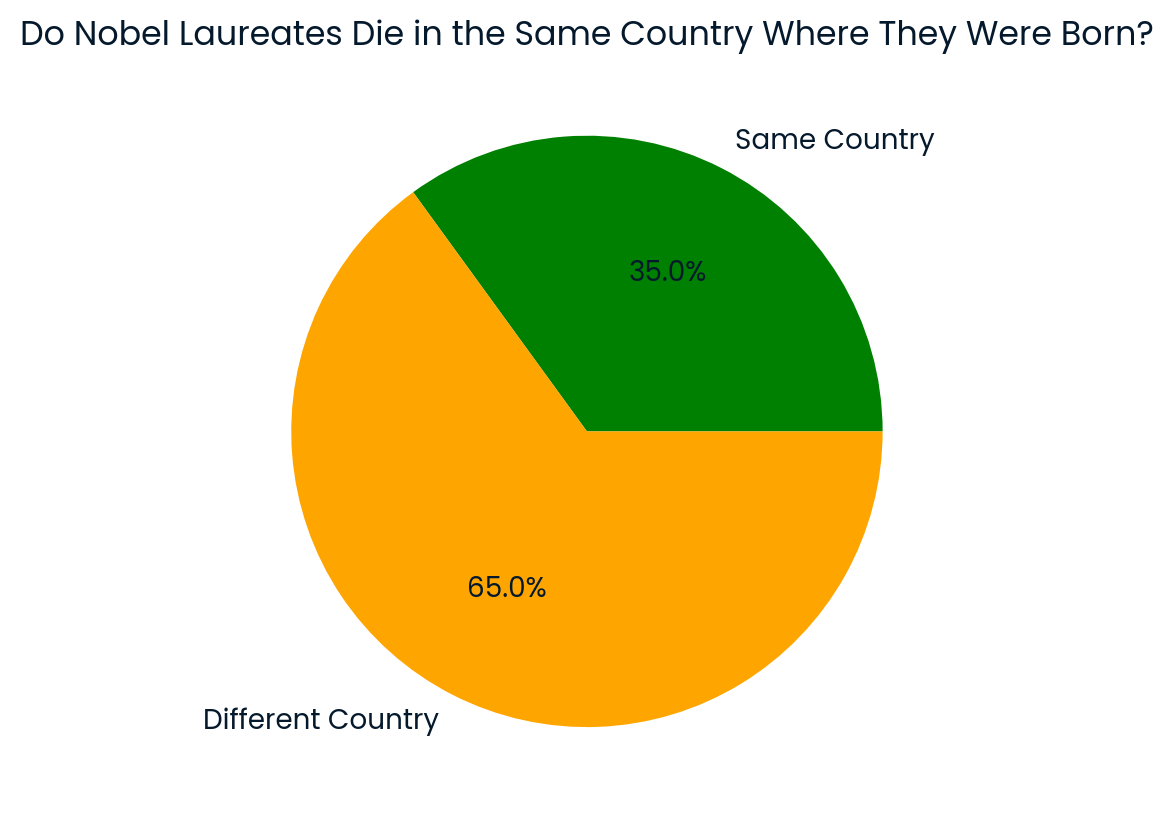

In [44]:
same_country = df[df['birth_country'] == df['death_country']].shape[0]
diff_country = df[df['birth_country'] != df['death_country']].shape[0]

plt.pie([same_country, diff_country], labels=['Same Country', 'Different Country'], autopct='%1.1f%%', colors=['green', 'orange'])
plt.title('Do Nobel Laureates Die in the Same Country Where They Were Born?')
plt.show()


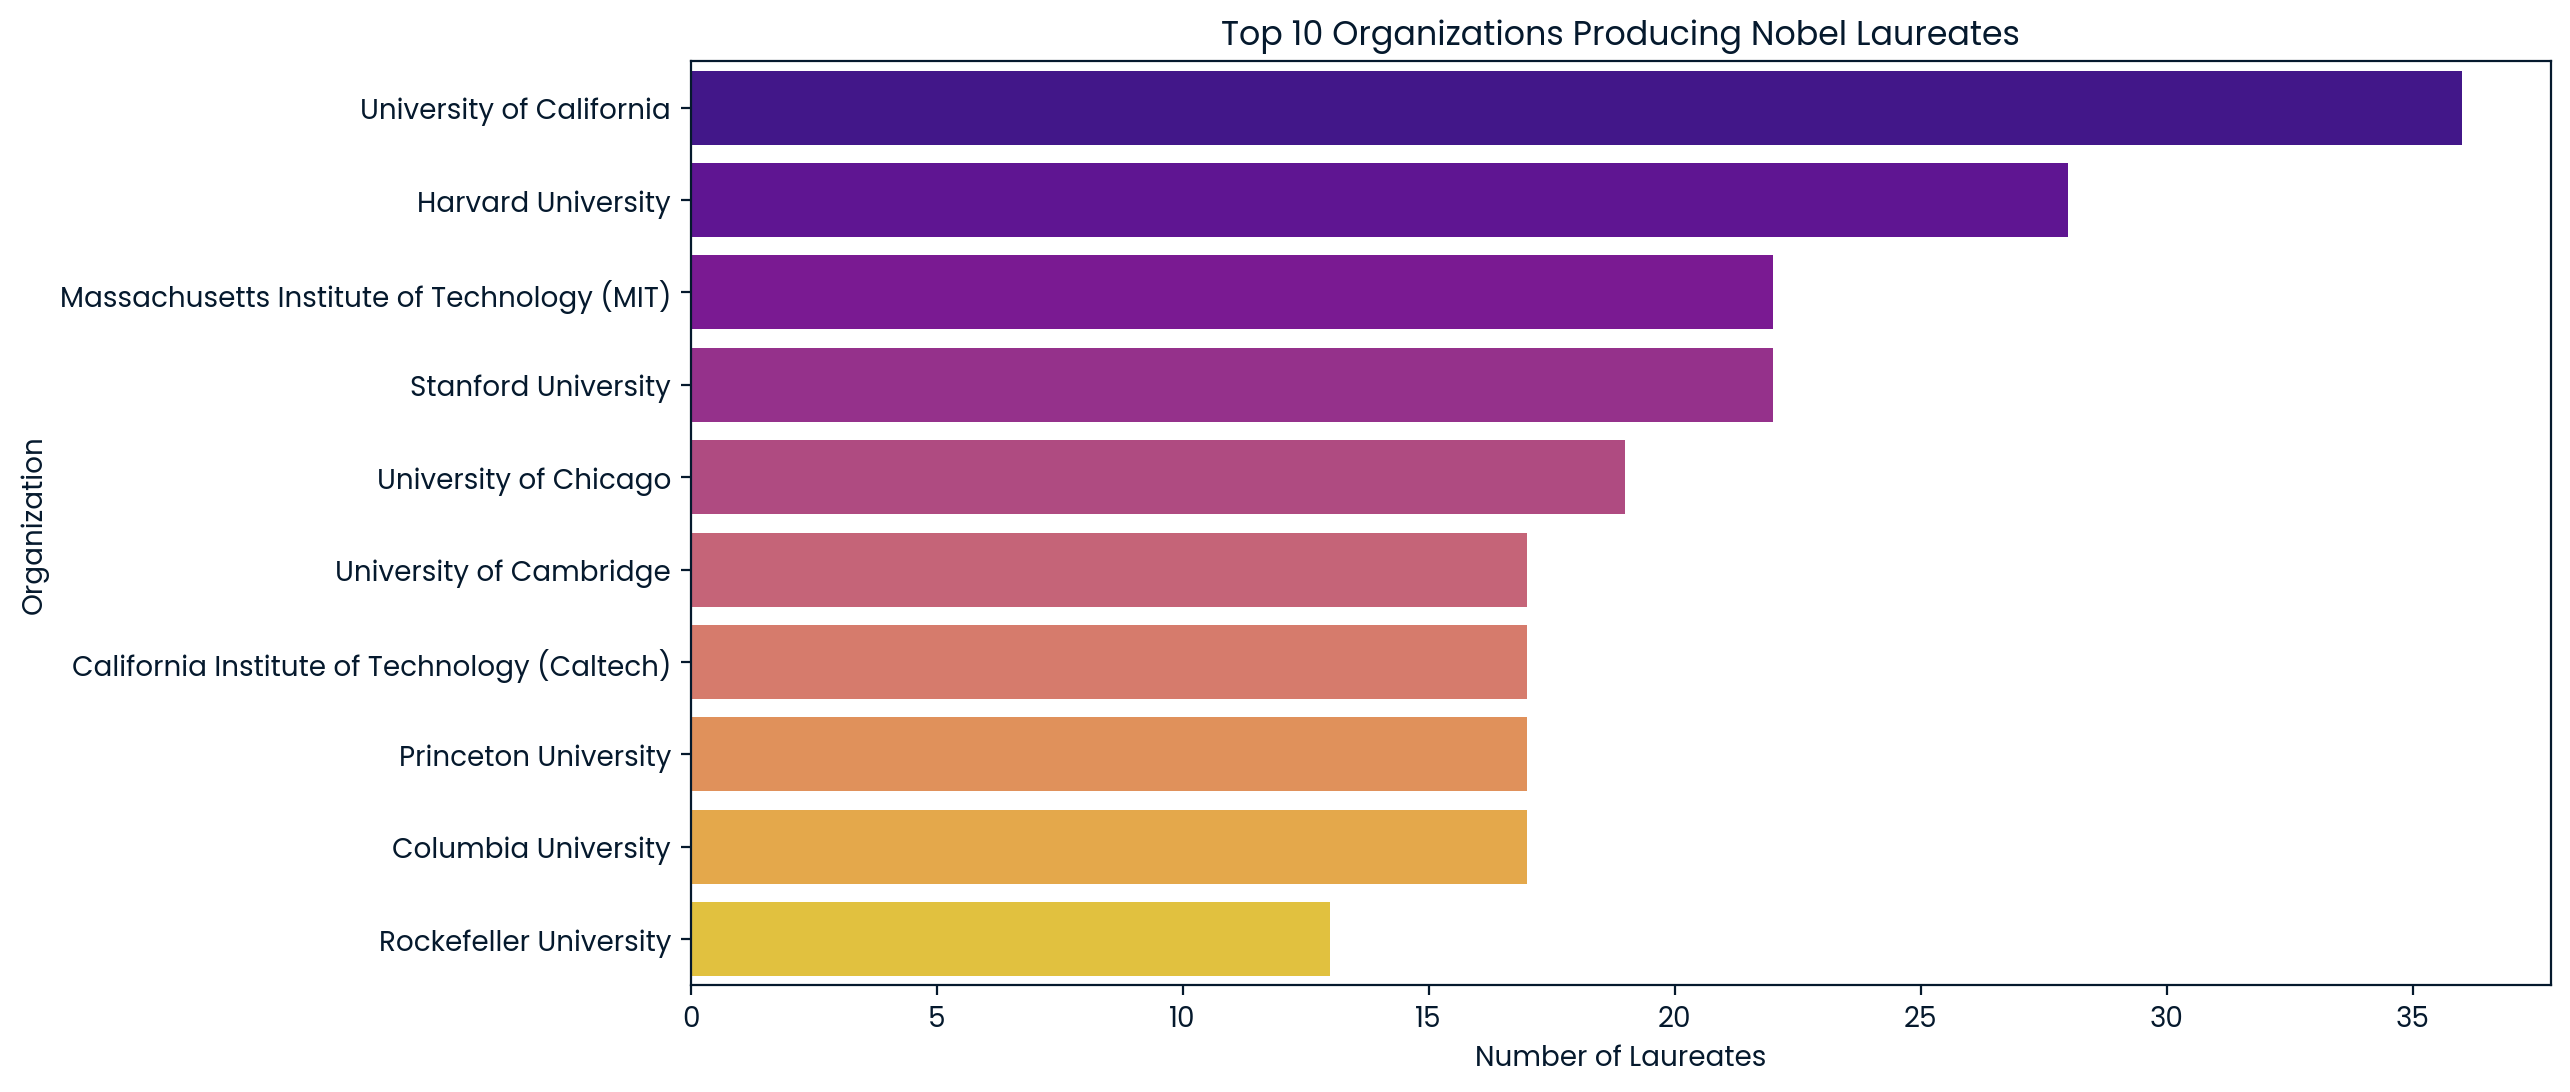

In [46]:
top_organizations = df['organization_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_organizations.values, y=top_organizations.index, palette='plasma')
plt.title('Top 10 Organizations Producing Nobel Laureates')
plt.xlabel('Number of Laureates')
plt.ylabel('Organization')
plt.show()


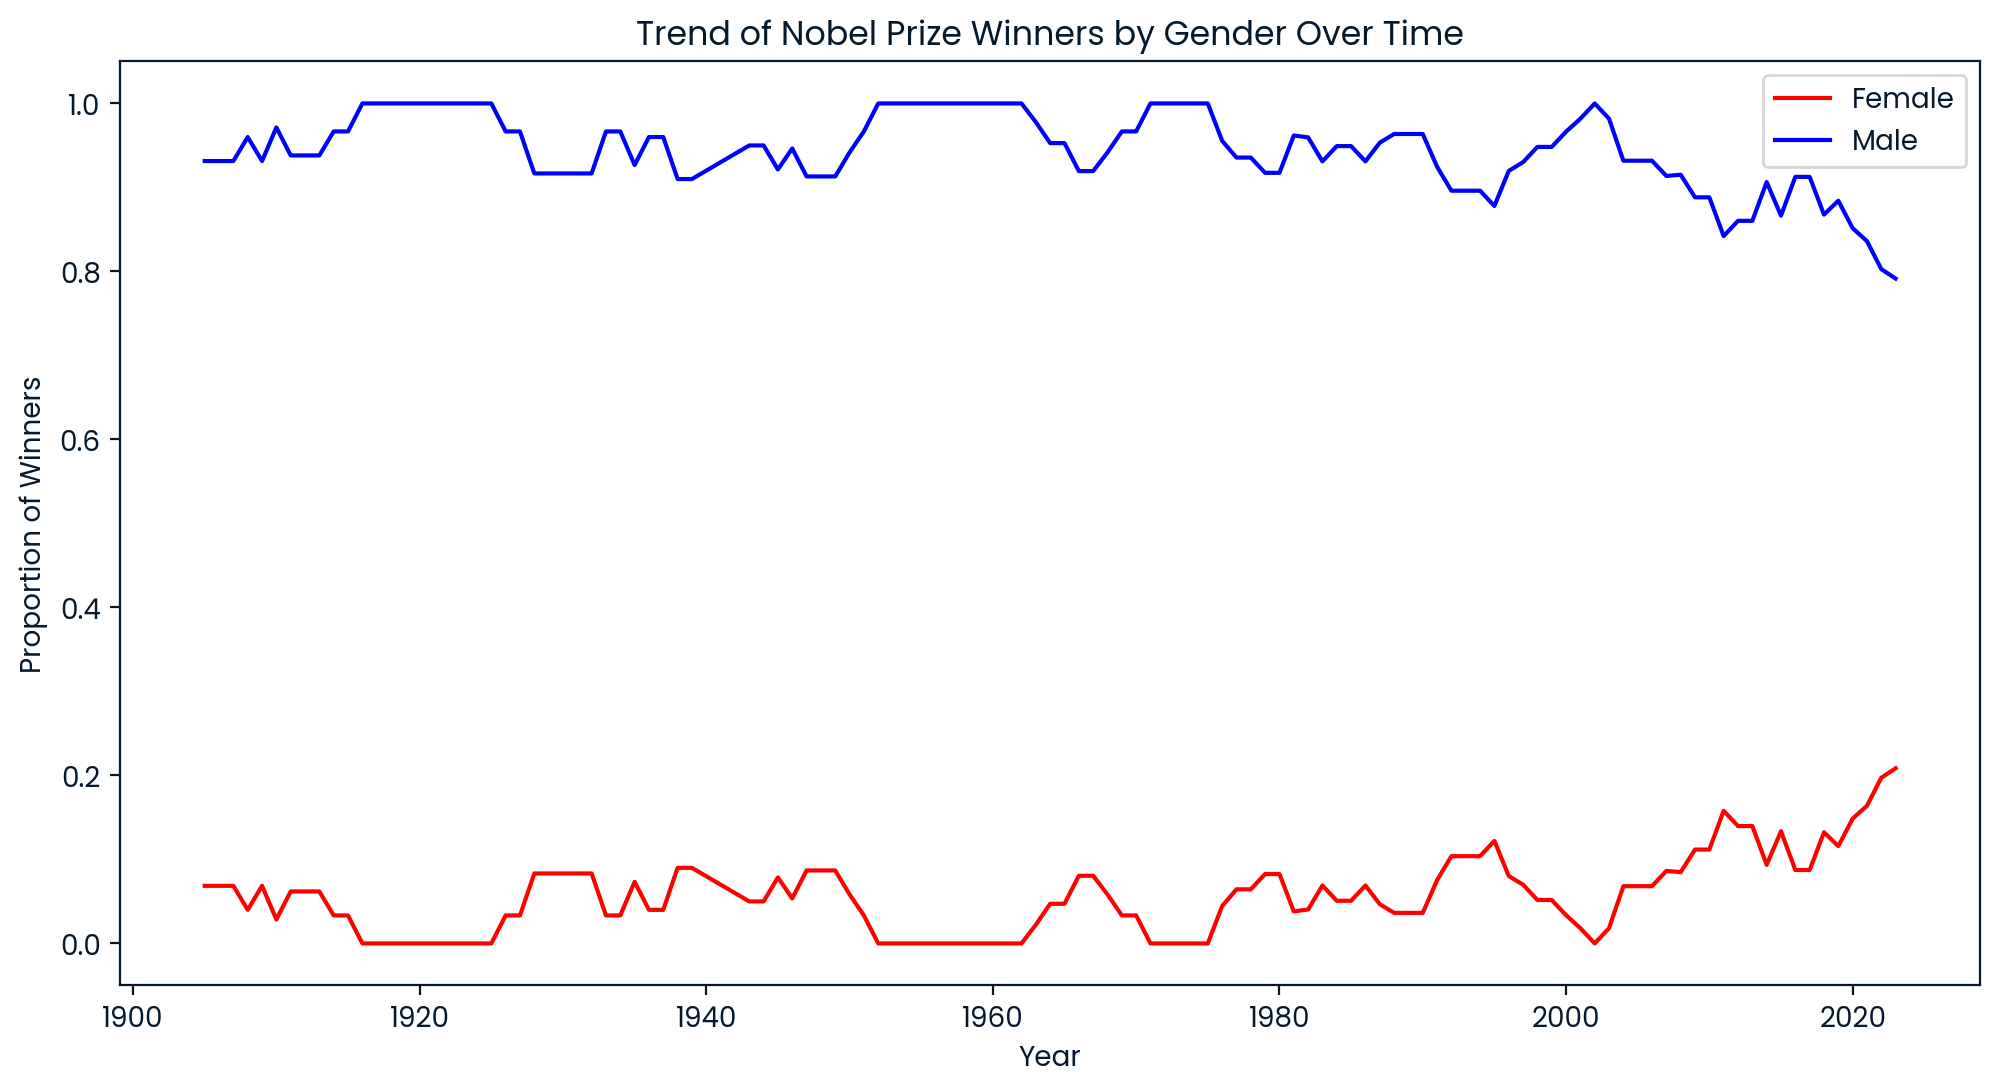

In [48]:
# Ensure 'year' is numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Convert gender to numeric representation
df['is_female'] = df['sex'].apply(lambda x: 1 if x == 'Female' else 0)
df['is_male'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)

# Compute rolling average (5-year window) for gender proportions
df_grouped = df.groupby('year').agg({'is_female': 'sum', 'is_male': 'sum'})
df_grouped['female_ratio'] = df_grouped['is_female'] / (df_grouped['is_female'] + df_grouped['is_male'])
df_grouped['male_ratio'] = df_grouped['is_male'] / (df_grouped['is_female'] + df_grouped['is_male'])
df_grouped = df_grouped.rolling(5).mean()  # Apply smoothing

# Plot gender trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x=df_grouped.index, y='female_ratio', label='Female', color='red')
sns.lineplot(data=df_grouped, x=df_grouped.index, y='male_ratio', label='Male', color='blue')
plt.title('Trend of Nobel Prize Winners by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Winners')
plt.legend()
plt.show()
